## CIFAR 10

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
PATH = "data/cifar10/"
os.makedirs(PATH,exist_ok=True)

In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159])) # mean, std

In [4]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [5]:
bs=128

### Look at data

In [6]:
data = get_data(32,4)

In [7]:
x,y=next(iter(data.trn_dl))

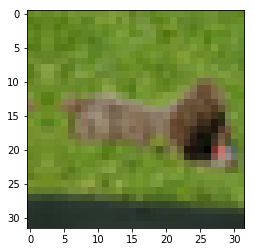

In [8]:
plt.imshow(data.trn_ds.denorm(x)[0]);

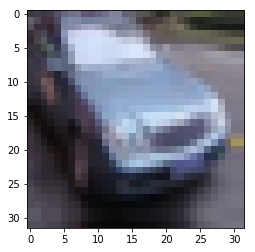

In [9]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Initial model

In [10]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [11]:
data = get_data(8,bs*4)

In [12]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [13]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 8, 8]),
                           ('output_shape', [-1, 64, 8, 8]),
                           ('trainable', True),
                           ('nb_params', 1728)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 8, 8]),
                           ('output_shape', [-1, 64, 8, 8]),
                           ('trainable', True),
                           ('nb_params', 128)])),
             ('Conv2d-3',
              OrderedDict([('input_shape', [-1, 64, 8, 8]),
                           ('output_shape', [-1, 512, 8, 8]),
                           ('trainable', True),
                           ('nb_params', 32768)])),
             ('BatchNorm2d-4',
              OrderedDict([('input_shape', [-1, 512, 8, 8]),
                           ('output_shape', [-1, 512, 8, 8]),
                           ('trainable', True),
                           ('nb_params', 1024)])),
    

In [14]:
lr=1e-2; wd=5e-4

In [15]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      2.989036   172947024.0 0.097656  



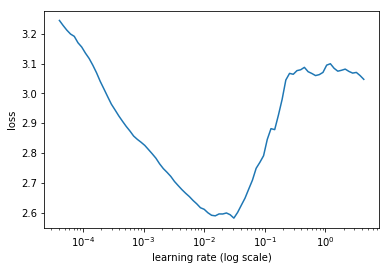

In [16]:
learn.sched.plot()

In [17]:
%time learn.fit(lr, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.838465   1.65096    0.408019  

CPU times: user 3min 30s, sys: 1min 36s, total: 5min 6s
Wall time: 4min 54s


[1.65096, 0.40801930129528047]

In [18]:
learn.fit(lr, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.525977   1.443921   0.479107  
    1      1.434017   1.381109   0.506612                 



[1.3811095, 0.5066119015216828]

In [19]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.372313   1.342363   0.519359  
    1      1.360764   1.338832   0.521634                 
    2      1.23792    1.273542   0.547696                 
    3      1.283399   1.367546   0.514827                 
    4      1.21       1.259882   0.549891                 
    5      1.097601   1.204052   0.571904                 
    6      1.012386   1.188235   0.57396                  



[1.188235, 0.5739602476358414]

In [20]:
learn.save('8x8_8')

## 16x16

In [21]:
learn.load('8x8_8')

In [22]:
learn.set_data(get_data(16,bs*2))

In [23]:
%time learn.fit(1e-3, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.540506   1.47373    0.477441  

CPU times: user 1min 56s, sys: 55.8 s, total: 2min 52s
Wall time: 2min 36s


[1.4737304, 0.47744140625]

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      2.34901    635.357239 0.065234  



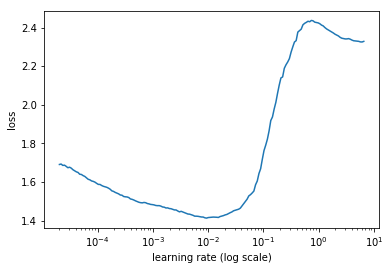

In [26]:
learn.sched.plot()

In [27]:
lr=1e-2

In [28]:
learn.fit(lr, 2, cycle_len=1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.225796   1.118082   0.6       
    1      1.061757   0.989655   0.649219                   



[0.9896547, 0.64921875]

In [29]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.97611    0.91118    0.675     
    1      0.959063   0.949105   0.66377                     
    2      0.781013   0.77951    0.718652                    
    3      0.871249   0.863258   0.694336                    
    4      0.742634   0.768241   0.732031                    
    5      0.630885   0.707739   0.75498                     
    6      0.552107   0.64909    0.774805                    



[0.6490902, 0.7748046875]

In [30]:
learn.save('16x16_8')

## 24x24

In [31]:
learn.load('16x16_8')

In [32]:
learn.set_data(get_data(24,bs))

In [33]:
learn.fit(1e-2, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.700255   0.712629   0.753362  



[0.7126289, 0.7533623417721519]

In [34]:
learn.unfreeze()

In [35]:
learn.fit(lr, 1, cycle_len=1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.614506   0.580579   0.800831  



[0.5805789, 0.8008306962025317]

In [36]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.54817    0.527482   0.817148  
    1      0.569647   0.567712   0.805874                    
    2      0.405793   0.44854    0.851562                    
    3      0.545356   0.646212   0.789359                    
    4      0.411653   0.497018   0.837718                    
    5      0.300841   0.398553   0.871934                    
    6      0.252084   0.373032   0.878758                    



[0.37303236, 0.8787579113924051]

In [37]:
learn.save('24x24_8')

In [38]:
log_preds,y = learn.TTA()
# preds = np.mean(np.exp(log_preds),0)metrics.log_loss(y,preds), accuracy(preds,y) # Invalid syntax
preds = np.mean(np.exp(log_preds),0)
metrics.log_loss(y,preds), accuracy_np(preds,y)

(0.34619089903291594, 0.8843)

## 32x32

In [39]:
learn.load('24x24_8')

In [40]:
learn.set_data(get_data(32,bs))

In [41]:
learn.fit(1e-2, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.31336    0.40382    0.862144  



[0.4038196, 0.8621439873417721]

In [42]:
learn.unfreeze()

In [43]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.302052   0.336448   0.885285  
    1      0.344767   0.454492   0.8571                      
    2      0.211337   0.298965   0.899624                    
    3      0.35453    0.531397   0.836234                    
    4      0.245101   0.393363   0.874703                    
    5      0.159376   0.279794   0.90981                     
    6      0.121336   0.266196   0.911986                    



[0.26619586, 0.9119857594936709]

In [44]:
learn.fit(lr, 3, cycle_len=4, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=12), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.283907   0.434218   0.862243  
    1      0.202203   0.336107   0.888647                    
    2      0.115983   0.262497   0.915051                    
    3      0.083738   0.255399   0.918018                     
    4      0.241292   0.462639   0.863627                    
    5      0.148604   0.299962   0.905459                    
    6      0.082738   0.257134   0.919502                     
    7      0.060521   0.252066   0.920985                     
    8      0.200242   0.688547   0.821499                    
    9      0.124902   0.298364   0.904668                    
    10     0.066166   0.253044   0.922073                     
    11     0.04829    0.243299   0.924842                     



[0.24329914, 0.9248417721518988]

In [45]:
log_preds,y = learn.TTA()
#metrics.log_loss(y,np.exp(log_preds)), accuracy(log_preds,y)
preds = np.mean(np.exp(log_preds),0)
metrics.log_loss(y,preds), accuracy_np(preds,y)

(0.21098502119279933, 0.9257)

In [46]:
learn.save('32x32_8')